In [248]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [249]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [250]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

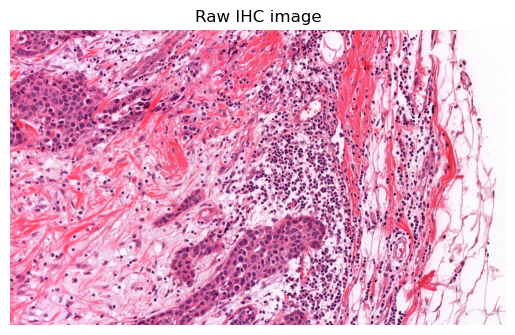

In [251]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [252]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[250.25185185  76.92407407 114.75925926]
[73.24444444 17.88888889 83.01111111]
[253.04947653 252.99819881 253.87267815]


### Inspect ROIs of stains and background to ensure correct stain color selection

#fa4c72
#491153
#fdfcfd


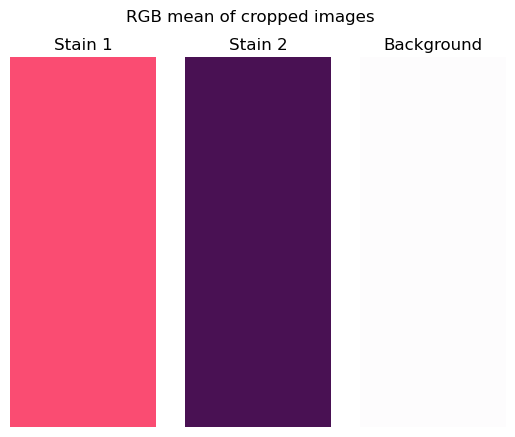

In [253]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [254]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = np.log10(T_stain1)
OD_stain2 = np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[0.00482814 0.51705515 0.34482823]
[0.53843075 1.15053406 0.48547974]


### Normalize the absorbances to vector lengths

In [255]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.linalg.norm(OD_stain1)
OD_stain2_norm = OD_stain2 / np.linalg.norm(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[0.0077684  0.8319325  0.55482246]
[0.3959342  0.8460434  0.35699675]


### Form a deconvolution matrix

In [256]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.transpose(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[0.0077684  0.3959342 ]
 [0.8319325  0.8460434 ]
 [0.55482246 0.35699675]]
M transposed
[[0.0077684  0.8319325  0.55482246]
 [0.3959342  0.8460434  0.35699675]]
Inversed M transposed multiplied with M
[[ 5.5254367  -5.00050137]
 [-5.00050137  5.5254367 ]]
Deconvolution matrix, D
[[-1.93694573  0.36614922  1.28047362]
 [ 2.14886348  0.5146796  -0.80182751]]


### Calculate the coefficient for each stain 

In [257]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [259]:
#Start coding here

# Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)

# Coefficient matrix
coeffs = np.tensordot(D, OD_img_ihc, axes=([1],[2]))

# Extracting the individual coefficients from the coefficient matrix
# Which are essentially the orthogonal representation of the stains of the IHC image
coeff_stain1 = coeffs[0]
coeff_stain2 = coeffs[1]

#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(2309, 3877)
(2309, 3877)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [260]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

# Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
for i in range(3):
    OD_img_ihc_stain1[:,:,i] = OD_stain1[i] * coeff_stain1
    OD_img_ihc_stain2[:,:,i] = OD_stain2[i] * coeff_stain2


### Convert the image absorbance to image transmittance  

In [261]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10**(-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10**(-OD_img_ihc_stain2)

array([[[1.10943998, 1.24847284, 1.09816641],
        [1.1007605 , 1.22769485, 1.09041704],
        [1.07235528, 1.16099028, 1.06501345],
        ...,
        [1.00242658, 1.00519234, 1.00218768],
        [1.01482134, 1.03193766, 1.01335408],
        [1.00242658, 1.00519234, 1.00218768]],

       [[1.20476742, 1.48893685, 1.182897  ],
        [1.14170518, 1.32734235, 1.12692218],
        [1.07544604, 1.16815229, 1.06778077],
        ...,
        [1.00442412, 1.00947737, 1.00398817],
        [1.01068355, 1.02296761, 1.00962785],
        [1.00219981, 1.0047065 , 1.00198326]],

       [[1.21093952, 1.50528387, 1.18835972],
        [1.14243835, 1.32916442, 1.12757467],
        [1.08505231, 1.19056197, 1.07637683],
        ...,
        [1.00442412, 1.00947737, 1.00398817],
        [1.00577237, 1.01237505, 1.00520323],
        [1.00577237, 1.01237505, 1.00520323]],

       ...,

       [[1.03294063, 1.07170838, 1.0296536 ],
        [1.03673731, 1.08014332, 1.0330654 ],
        [1.03136141, 1

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [262]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [263]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Visualize deconvolved images

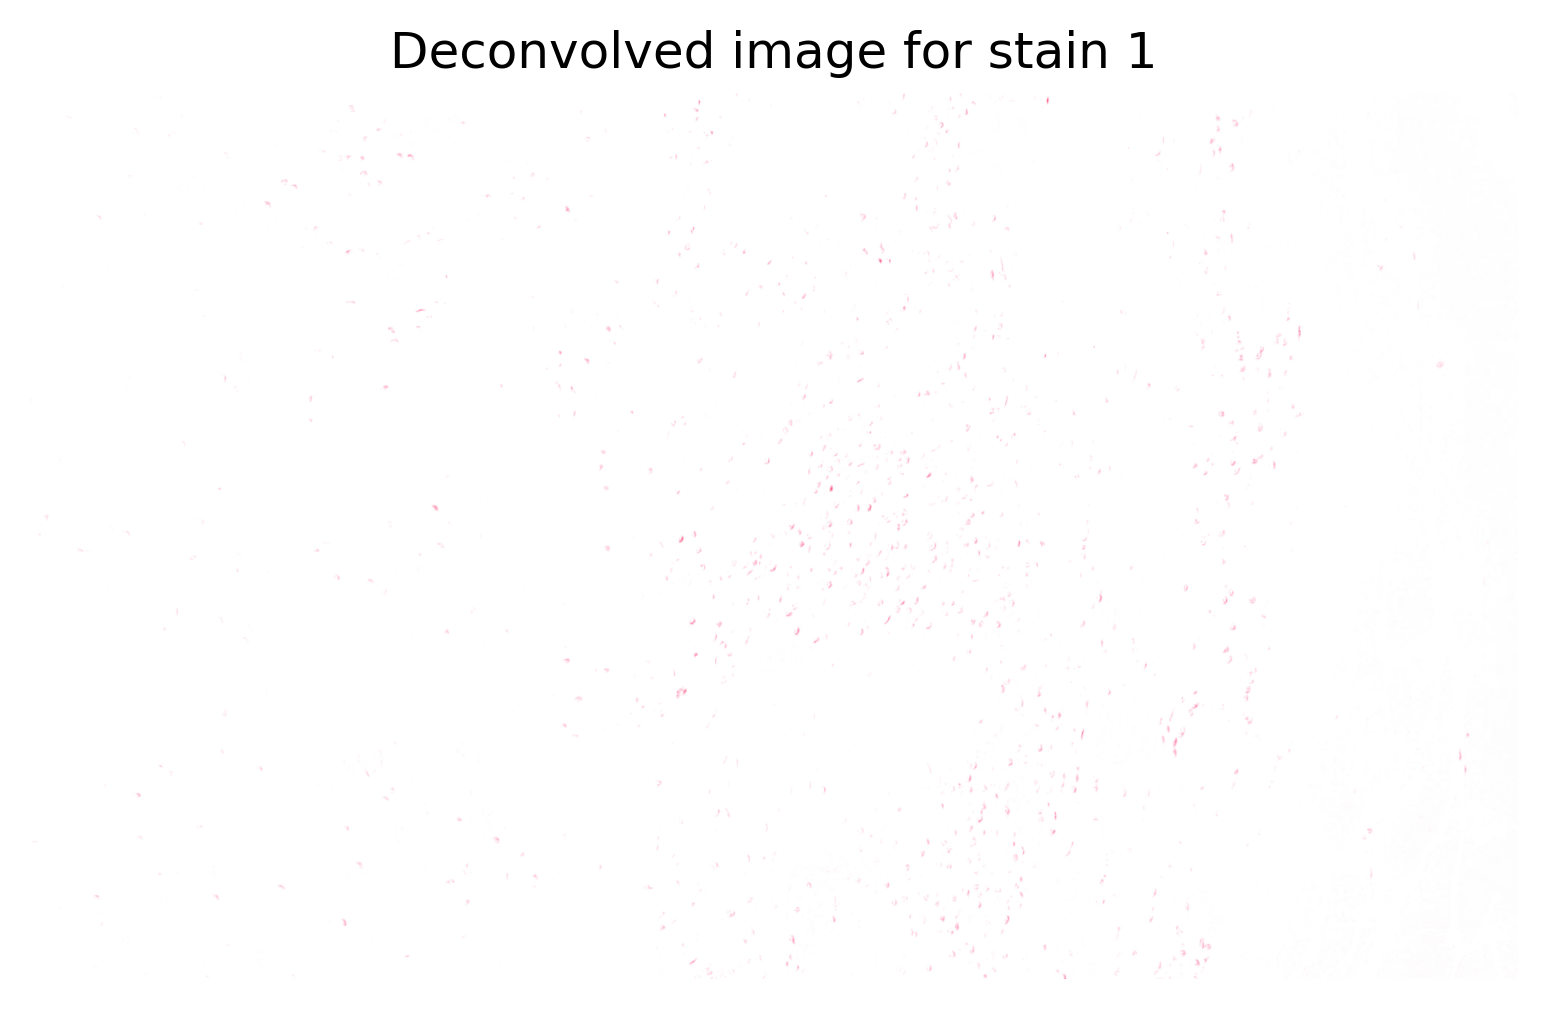

In [264]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

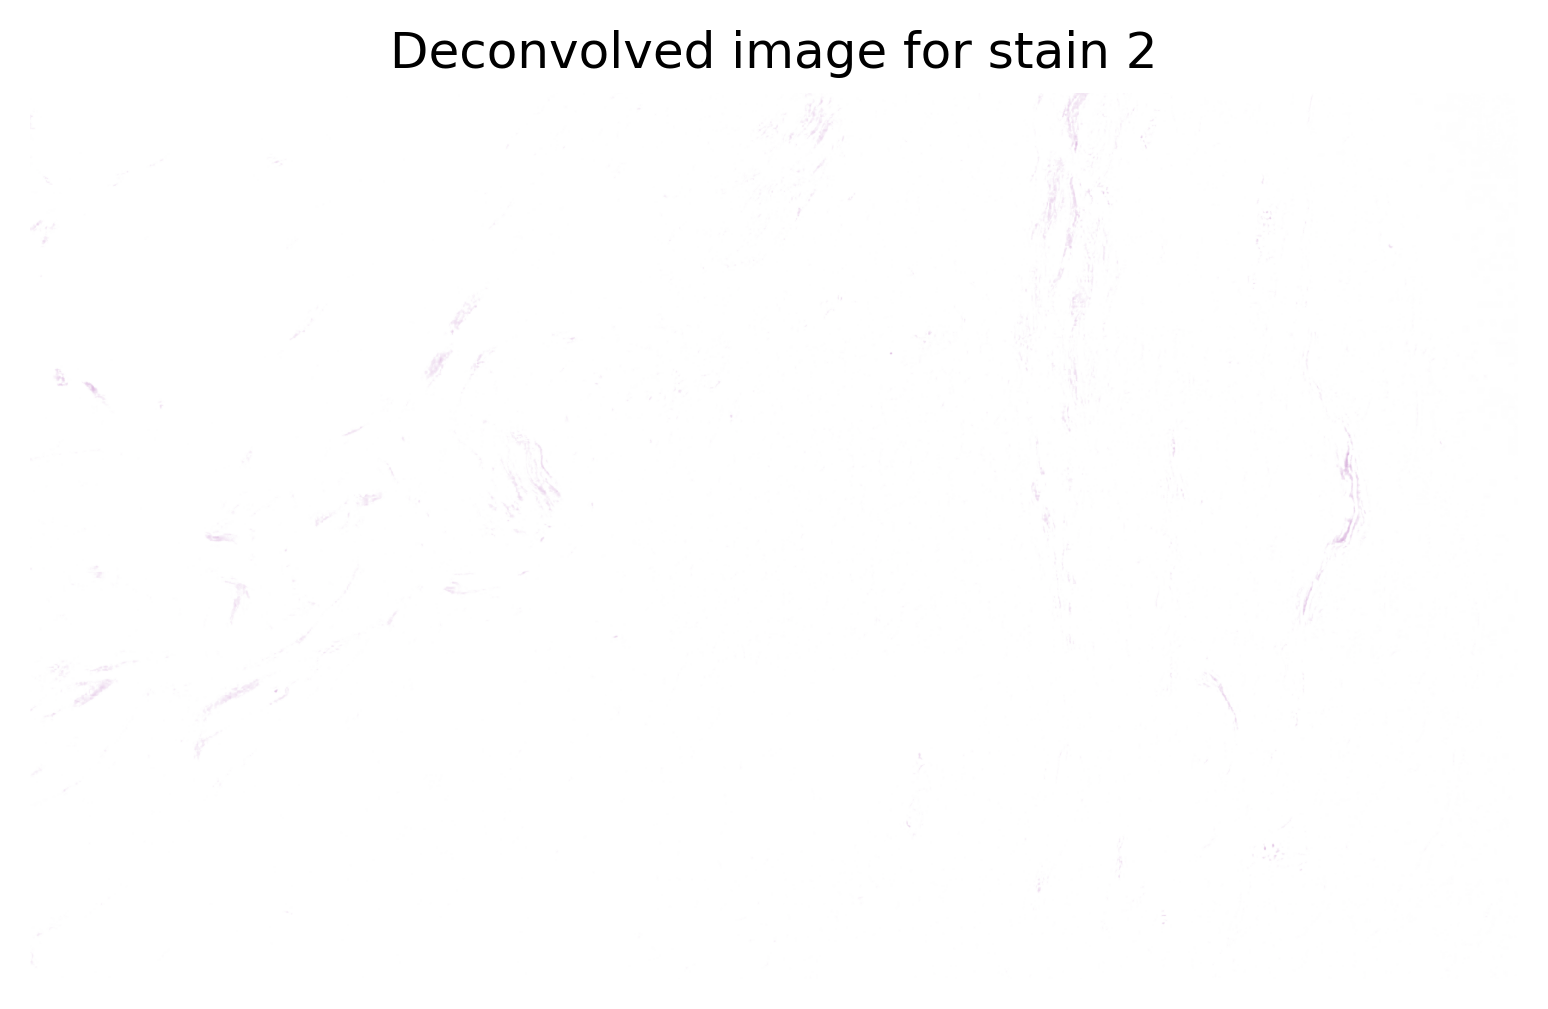

In [265]:
#Display and export deconvolved image for stain 2
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')